In [1]:
# Diagnosing Heart Disease using ML models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#Getting the Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age',
        'sex',
        'cp',          # cp = chest pain
        'trestbps',    # trestbps = resting blood pressure
        'chol',        # chol - cholesterol
        'fbs',         # fbs = fasting blood sugar      
        'restecg',     # restecg = resting electrocardiographic results
        'thalach',     # thalach = maximum heart rate achieved
        'exang',       # exang = exercise induced angina
        'oldpeak',     # oldpeak = ST depression induced by exercise relative to rest
        'slope',       # slope = the slope of the peak exercise ST segment
        'ca',          # ca = number of major vessels (0-3) colored by flourosopy
        'thal',        # thal = 3 = normal; 6 = fixed defect; 7 = reversable defec
        'class']
df = pd.read_csv(url, names=names)
df['class'] = df['class'].apply(lambda x: 0 if x == 0 else 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.shape

(303, 14)

In [4]:
# remove the missing data (indicated with a '?')
df = df[~df.isin(['?'])]
print(df.loc[280:])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0  

In [5]:
df.shape

(303, 14)

In [6]:
# drop rows with NaN values from dataframe
df = df.dropna(axis=0)
print(df.loc[280:])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0    166.0    0.0      1.2   
292  44.0  1.0  4.0     120.0  169.0  0.0      0.0  

In [7]:
# print the shape and data type of the dataframe
print (df.shape)
print (df.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [8]:
# transform data to numeric to enable further analysis
df = df.apply(pd.to_numeric)
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


In [9]:
# print data characteristics using pandas in-built describe() function
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

In [10]:
#0 = No and 1 = yes
df['class'].value_counts()

0    160
1    137
Name: class, dtype: int64

In [11]:
#Age Distribution of Heart Disease
df['age'].value_counts()

58.0    18
57.0    17
54.0    16
59.0    14
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
52.0    11
41.0    10
64.0    10
63.0     9
67.0     9
55.0     8
42.0     8
65.0     8
61.0     8
45.0     8
46.0     7
53.0     7
43.0     7
66.0     7
50.0     7
48.0     7
47.0     5
49.0     5
39.0     4
68.0     4
35.0     4
70.0     4
69.0     3
40.0     3
71.0     3
34.0     2
37.0     2
74.0     1
29.0     1
77.0     1
38.0     1
76.0     1
Name: age, dtype: int64

# Data Visualization

In [12]:
#Importing dataset

import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

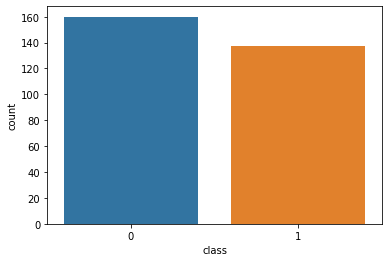

In [13]:
#Class Distribution: 0 = No and 1 = Yes
sns.countplot(df['class'])
plt.show()
plt.rcParams['figure.figsize'] = [10,6]

<Figure size 720x720 with 0 Axes>

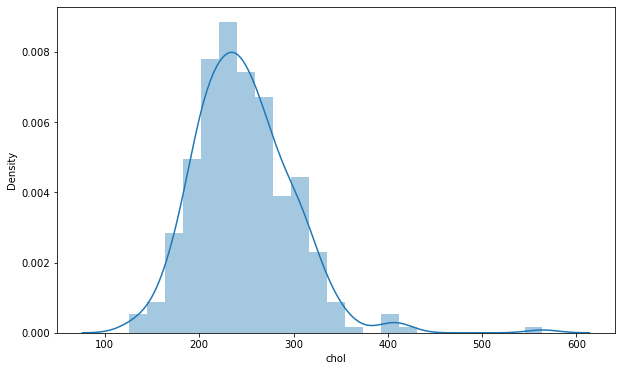

<Figure size 720x720 with 0 Axes>

In [14]:
sns.distplot(df['chol'])
plt.figure(figsize=(10,10))

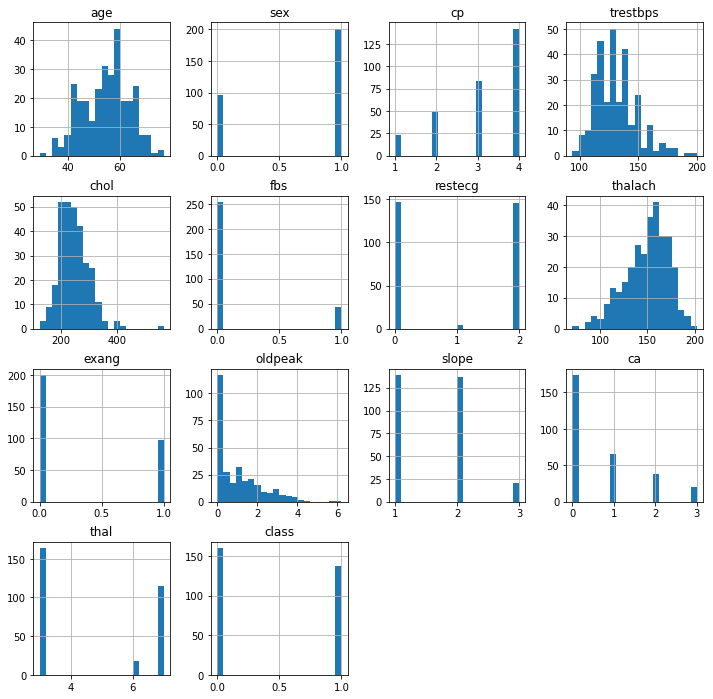

In [15]:
# plot histograms for each variable
df.hist(figsize = (12, 12), bins = 20)
plt.show()

<AxesSubplot:>

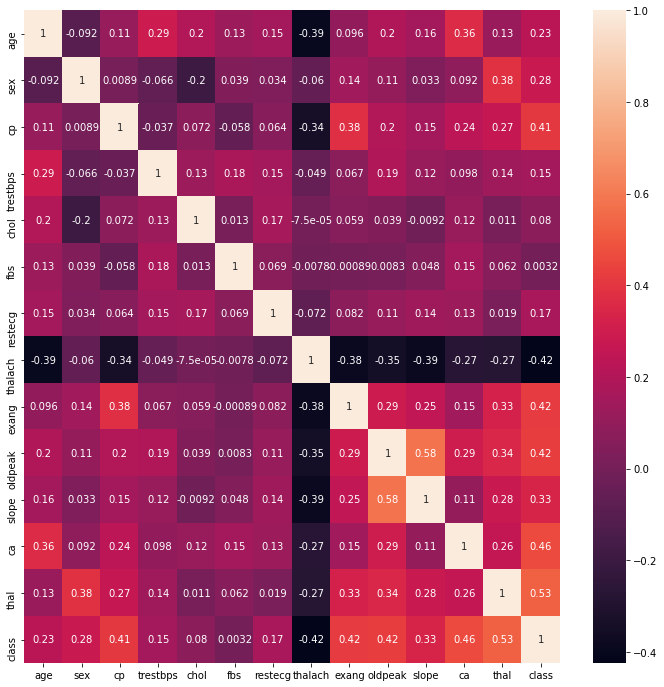

In [16]:
# heat map for expressing correlation
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr,annot=True)

## Data Analysis 

In [17]:
# feature selection
X = df.drop(columns=['class'])
Y = df['class']
print("Features Extraction Sucessfull")

Features Extraction Sucessfull


In [18]:
# feature importance

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07262596 0.04054145 0.11593065 0.06254791 0.05975995 0.01964236
 0.03205281 0.08577195 0.07947336 0.07748596 0.05515199 0.11894556
 0.18007009]


In [19]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

# Running the ML models

In [20]:
# Using Logistic Regression

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train,Y_train)
Y_pred_logreg = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_logreg))
print('Precision', metrics.precision_score(Y_test, Y_pred_logreg))

Accuracy Score: 0.9333333333333333
Precision 0.9473684210526315


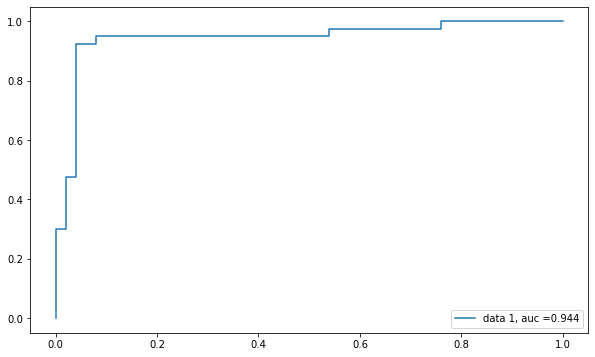

In [21]:
# ROC Curve For Logistic Regression
y_pred_prob = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_pred_prob)
plt.plot(fpr, tpr, label = 'data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()

Text(51.0, 0.5, 'Actual')

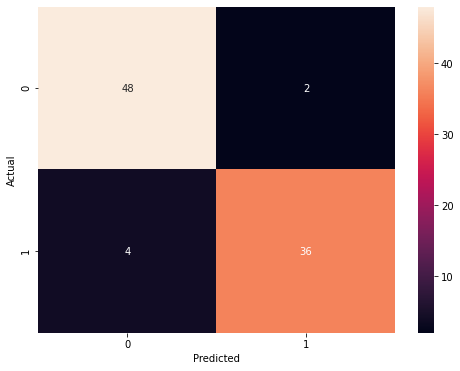

In [22]:
#Confusion Matrix of Logistic Regression 
C_M = confusion_matrix(Y_test, Y_pred_logreg)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(C_M, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [23]:
# Decision Tree Accuracy Score

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtree.fit(X_train,Y_train)
y_pred_dtree = dtree.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred_dtree))
print('Precision', metrics.precision_score(Y_test, y_pred_dtree))

Accuracy Score: 0.7555555555555555
Precision 0.7045454545454546


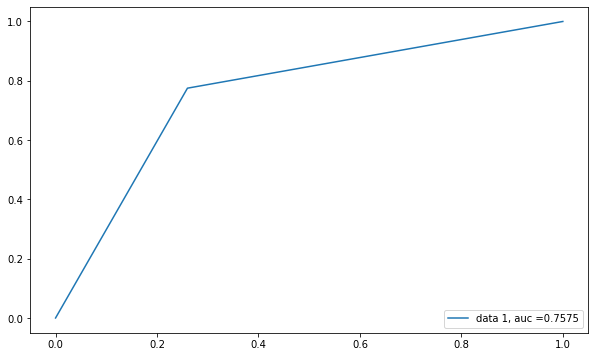

In [24]:
#ROC Curve For Decisio Tree
y_pred_prob = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_pred_prob)
plt.plot(fpr, tpr, label = 'data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()

Text(51.0, 0.5, 'Actual')

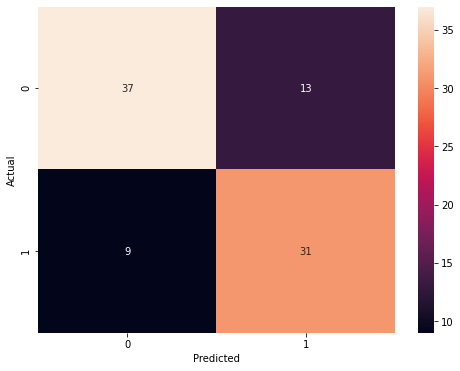

In [48]:
#Confusion Matrix of Decision Tree
C_M = confusion_matrix(Y_test, y_pred_dtree)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(C_M, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
# model improvement for Decisison Tree
#DecisionTree 5 fold cross validation

import sklearn
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(random_state=1)
results = sklearn.model_selection.cross_val_score(dt, X_train,Y_train, cv=5)
print(results)
print(results.mean(), results.std())

[0.66666667 0.78571429 0.75609756 0.70731707 0.75609756]
0.7343786295005806 0.04218059105688463


In [26]:
# BAGGING Ensemble for Decision Tree
# Create a bag of estimators of size 100

dt_bag = BaggingClassifier(base_estimator=dt, n_estimators = 100, random_state=1, n_jobs=-1)

# Fit / Train model
dt_bag.fit(X_train,Y_train)

#Results
results = dt_bag.score(X_test, Y_test)
results

0.8

In [27]:
# Using Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, Y_train)
y_pred2_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2_rf))
print('Precision', metrics.precision_score(Y_test, y_pred2_rf))

Accuracy Score: 0.8666666666666667
Precision 0.8333333333333334


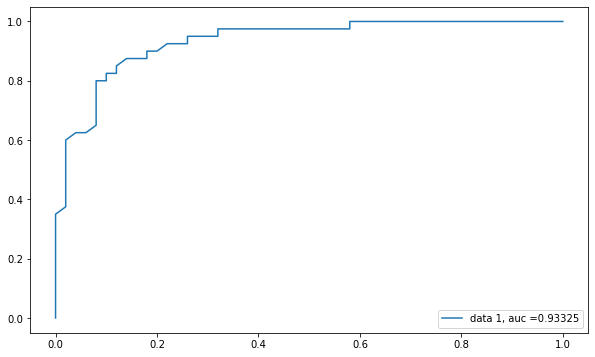

In [28]:
#ROC Curve For Random Forest
y_pred_prob = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_pred_prob)
plt.plot(fpr, tpr, label = 'data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()

Text(51.0, 0.5, 'Actual')

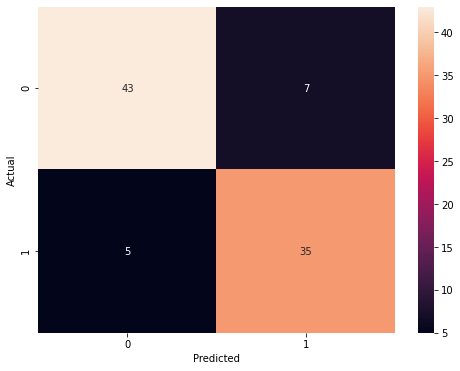

In [49]:
#Confusion Matrix of Random Forest
C_M = confusion_matrix(Y_test, y_pred2_rf)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(C_M, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
# Using Xgboost

import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=1)
xgb.fit(X_train, Y_train)
y_pred5_xgboost = xgb.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5_xgboost))
print('Precision', metrics.precision_score(Y_test, y_pred5_xgboost))

[16:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8111111111111111
Precision 0.8108108108108109


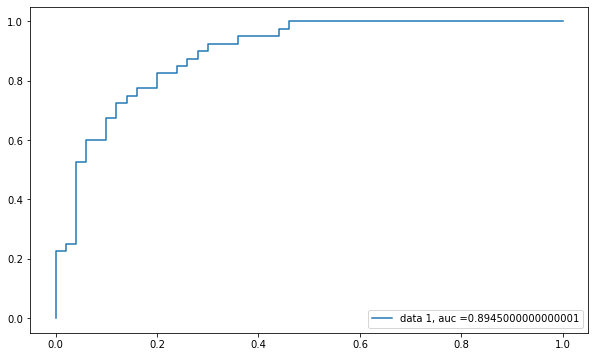

In [30]:
#ROC Curve For XGBoost
y_pred_prob = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_prob)
auc = metrics.roc_auc_score(Y_test,y_pred_prob)
plt.plot(fpr, tpr, label = 'data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()

Text(51.0, 0.5, 'Actual')

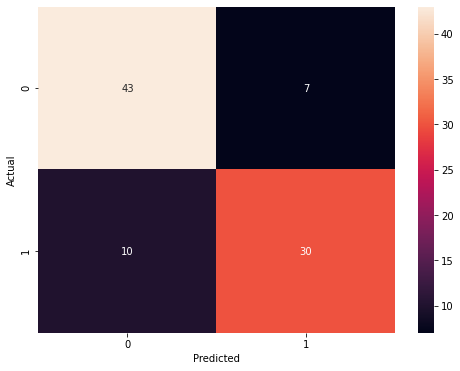

In [50]:
#Confusion Matrix of Xgboost
C_M = confusion_matrix(Y_test, y_pred5_xgboost)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(C_M, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
#Neural Network Model
import keras
import tensorflow
from keras.layers import Dense
model8 = keras.Sequential()
model8.add(Dense(15,input_dim=13, activation ='sigmoid'))
model8.add(Dense(20,activation='sigmoid'))
model8.add(Dense(12,activation='sigmoid'))
model8.add(Dense(9,activation='sigmoid'))
model8.add(Dense(5,activation='sigmoid'))
model8.add(Dense(1,activation='sigmoid'))
model8.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model8.fit(X_train, Y_train,epochs=1000)

Epoch 1/1000
7/7 [==============================] - 1s 4ms/step - loss: 0.7148 - accuracy: 0.5037
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.5367
Epoch 3/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5606
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.5397
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5434
Epoch 6/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.6839 - accuracy: 0.5666
Epoch 7/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.5153
Epoch 8/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.5422
Epoch 9/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5162
Epoch 10/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.5622
Epoch 11/1000
7/7

7/7 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5903
Epoch 83/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.5725
Epoch 84/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5413
Epoch 85/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6769 - accuracy: 0.5415
Epoch 86/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.5792
Epoch 87/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6769 - accuracy: 0.6231
Epoch 88/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.6245
Epoch 89/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.6806 - accuracy: 0.6132
Epoch 90/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.6508
Epoch 91/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6432
Epoch 92/1000
7/7 [====

7/7 [==============================] - 0s 5ms/step - loss: 0.5231 - accuracy: 0.7109
Epoch 164/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4863 - accuracy: 0.7992
Epoch 165/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7625
Epoch 166/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.7811
Epoch 167/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.7549
Epoch 168/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4798 - accuracy: 0.8025
Epoch 169/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.7830
Epoch 170/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7987
Epoch 171/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.5061 - accuracy: 0.7928
Epoch 172/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7606
Epoch 173/1000


7/7 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.7950
Epoch 246/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.7580
Epoch 247/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4966 - accuracy: 0.7535
Epoch 248/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.7862
Epoch 249/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7767
Epoch 250/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7639
Epoch 251/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4803 - accuracy: 0.7701
Epoch 252/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4654 - accuracy: 0.7821
Epoch 253/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7757
Epoch 254/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.7949
Epoch 255/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7190
Epoch 328/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.5066 - accuracy: 0.7431
Epoch 329/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7458
Epoch 330/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.7716
Epoch 331/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.7710
Epoch 332/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4459 - accuracy: 0.7784
Epoch 333/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7878
Epoch 334/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.7553
Epoch 335/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4511 - accuracy: 0.7991
Epoch 336/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.5010 - accuracy: 0.7399
Epoch 337/1000


7/7 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.8013
Epoch 409/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7949
Epoch 410/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.8084
Epoch 411/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.8265
Epoch 412/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4190 - accuracy: 0.8188
Epoch 413/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4108 - accuracy: 0.8143
Epoch 414/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4234 - accuracy: 0.8383
Epoch 415/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4180 - accuracy: 0.8297
Epoch 416/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.8298
Epoch 417/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8174
Epoch 418/1000


7/7 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.8235
Epoch 490/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8125
Epoch 491/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8272
Epoch 492/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.3902 - accuracy: 0.8308
Epoch 493/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8380
Epoch 494/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.3787 - accuracy: 0.8308
Epoch 495/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8259
Epoch 496/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.4133 - accuracy: 0.8269
Epoch 497/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4342 - accuracy: 0.7856
Epoch 498/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4301 - accuracy: 0.8099
Epoch 499/100

7/7 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8152
Epoch 571/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8271
Epoch 572/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8539
Epoch 573/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8018
Epoch 574/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8191
Epoch 575/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8128
Epoch 576/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8152
Epoch 577/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.3373 - accuracy: 0.8697
Epoch 578/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8347
Epoch 579/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3856 - accuracy: 0.8535
Epoch 580/1000


7/7 [==============================] - 0s 5ms/step - loss: 0.3463 - accuracy: 0.8644
Epoch 653/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.3323 - accuracy: 0.8746
Epoch 654/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3914 - accuracy: 0.8308
Epoch 655/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8574
Epoch 656/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8252
Epoch 657/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3779 - accuracy: 0.8374
Epoch 658/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3530 - accuracy: 0.8554
Epoch 659/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8759
Epoch 660/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.8541
Epoch 661/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.3310 - accuracy: 0.8712
Epoch 662/1000


Epoch 734/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8817
Epoch 735/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8283
Epoch 736/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8450
Epoch 737/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8574
Epoch 738/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.3846 - accuracy: 0.8426
Epoch 739/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.3270 - accuracy: 0.8719
Epoch 740/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3753 - accuracy: 0.8507
Epoch 741/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4065 - accuracy: 0.8284
Epoch 742/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.8569
Epoch 743/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4186 - accuracy: 0.8174


7/7 [==============================] - 0s 3ms/step - loss: 0.3779 - accuracy: 0.8586
Epoch 816/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8484
Epoch 817/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8330
Epoch 818/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8696
Epoch 819/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.3115 - accuracy: 0.8852
Epoch 820/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3869 - accuracy: 0.8289
Epoch 821/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3837 - accuracy: 0.8589
Epoch 822/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0.8589
Epoch 823/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.8748
Epoch 824/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8674
Epoch 825/1000


7/7 [==============================] - 0s 4ms/step - loss: 0.3391 - accuracy: 0.8697
Epoch 897/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8342
Epoch 898/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8444
Epoch 899/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.8400
Epoch 900/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8624
Epoch 901/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3929 - accuracy: 0.8433
Epoch 902/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 0.8585
Epoch 903/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3439 - accuracy: 0.8667
Epoch 904/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8658
Epoch 905/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8597
Epoch 906/1000


7/7 [==============================] - 0s 4ms/step - loss: 0.3260 - accuracy: 0.8800
Epoch 979/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8600
Epoch 980/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8420
Epoch 981/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8536
Epoch 982/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.4204 - accuracy: 0.8446
Epoch 983/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8592
Epoch 984/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3273 - accuracy: 0.8602
Epoch 985/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.8397
Epoch 986/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8341
Epoch 987/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.8588
Epoch 988/1000


In [32]:
model8.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7889


[0.5130748152732849, 0.7888888716697693]

In [33]:
# Models Comparison

results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','Xgboost'],
    'Score': [accuracy_score(Y_test,Y_pred_logreg),
             accuracy_score(Y_test,y_pred_dtree),
             accuracy_score(Y_test,y_pred2_rf),
             accuracy_score(Y_test,y_pred5_xgboost)]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

print('\nNN Accuracy')
x8 = model8.evaluate(X_test,Y_test)
print(x8)

                        Model
Score                        
0.933333  Logistic Regression
0.866667        Random Forest
0.811111              Xgboost
0.755556        Decision Tree

NN Accuracy
3/3 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7889
[0.5130748152732849, 0.7888888716697693]


###  Custom Ensemble (Superlearner) with the two best models in two layers

In [34]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
ensemble = SuperLearner(scorer=accuracy_score, random_state=1, verbose=2)

[MLENS] backend: threading


In [35]:
# Build the first layer
ensemble.add([rf, log_reg])

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...48BB160>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function accuracy_score at 0x000001A0848BB160>,
       shuffle=False, verbose=2)

In [36]:
# Attach the final meta estimator
ensemble.add_meta(LogisticRegression())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...48BB160>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function accuracy_score at 0x000001A0848BB160>,
       shuffle=False, verbose=2)

In [37]:
# Fit ensemble
ensemble.fit(X_train, Y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:01


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...48BB160>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function accuracy_score at 0x000001A0848BB160>,
       shuffle=False, verbose=2)

In [38]:
#pred_vals = ensemble.predict(X_test)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train), Y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test), Y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.8260869565217391

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9333333333333333


In [39]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  logisticregression           0.82     0.04  0.18  0.03  0.00  0.00
layer-1  randomforestclassifier       0.78     0.05  0.70  0.02  0.04  0.01



###  Custom Ensemble (Superlearner) with the two less accurate models in two layers 

In [40]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=1, verbose=2)

In [41]:
# Build the first layer
ensemble.add([ dtree, xgb])

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...48BB160>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function accuracy_score at 0x000001A0848BB160>,
       shuffle=False, verbose=2)

In [42]:
# Attach the final meta estimator
ensemble.add_meta(LogisticRegression())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...48BB160>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function accuracy_score at 0x000001A0848BB160>,
       shuffle=False, verbose=2)

In [43]:
# Fit ensemble
ensemble.fit(X_train, Y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_exc...48BB160>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function accuracy_score at 0x000001A0848BB160>,
       shuffle=False, verbose=2)

In [44]:
#pred_vals = ensemble.predict(X_test)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train), Y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test), Y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.7888888888888889


In [45]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  decisiontreeclassifier       0.72     0.01  0.01  0.00  0.01  0.00
layer-1  xgbclassifier                0.73     0.08  0.15  0.00  0.00  0.00

